# Gender and Racial subgroups

In [1]:
# LOAD PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr
import plotly.express as px
from factor_analyzer import FactorAnalyzer
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

In [2]:
# setting working Directory
os.chdir("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data")
current_path = os.getcwd()
print(current_path)

/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data


In [3]:
## Load All data
df1= pd.read_csv("data2018.csv", low_memory=False)
df2= pd.read_csv("data2019.csv", low_memory=False)
df3= pd.read_csv("Febr2020o.csv", low_memory=False)
df_state= pd.read_csv("uszips.csv", low_memory=False)
dfmaster= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data/MasterData_new.csv", low_memory=False)
dfmng= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data/manager.csv", low_memory=False)

In [4]:
dfmaster['WorkZip_master']=(pd.to_numeric(dfmaster['WorkZip_master'], errors='coerce'))

In [5]:
## Merge master data with Zipcode State data
dfmaster2=pd.merge(dfmaster, df_state, how='left',  left_on="WorkZip_master", right_on="zip",  indicator=True)
dfmaster2

,Employee ID,ManagerID,Demographics (Race),Age_master,Female_master,Status_master,Pay type_master,WorkStatus,WorkStatus2_master,CurrentPay_master,...,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name,_merge
0,133267.0,126441.0,White,42.0,1.0,A,H,F,R,44.33,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
1,101365.0,126441.0,White,54.0,1.0,T,H,P,T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
2,134205.0,126441.0,White,25.0,1.0,A,H,P,R,40.3,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
3,124516.0,126441.0,White,52.0,1.0,T,H,P,T,50,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
4,126438.0,126441.0,White,49.0,1.0,A,H,P,R,50.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33928,10215.0,25480.0,White,64.0,1.0,A,H,F,R,16.14,...,"Yes, I have a disability",596876.0,Zuercher10215,Zuercher10215,zuercher10215,zuercher10215,45833.0,OH,Ohio,both
33929,106874.0,10274.0,Hispanic or Latino,20.0,1.0,T,H,P,R,12.32,...,NaN,NaN,Zuniga106874,Zuniga106874,NaN,zuniga106874,45856.0,OH,Ohio,both
33930,127672.0,126441.0,White,30.0,1.0,A,H,F,R,14.21,...,NaN,NaN,NaN,NaN,furtado127672,NaN,2719.0,MA,Massachusetts,both
33931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [6]:
dfmaster2.groupby(["_merge"]).count()

,Employee ID,ManagerID,Demographics (Race),Age_master,Female_master,Status_master,Pay type_master,WorkStatus,WorkStatus2_master,CurrentPay_master,...,DepartmentName,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,3499,3475,2966,3499,3499,3499,3499,2862,2862,3498,...,825,825,840,993,1006,996,1089,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,30432,28782,24041,30432,30431,30432,29790,25626,25626,29728,...,7470,7470,8095,9737,9727,10000,11950,30432,30432,30432


In [7]:
dfmaster=dfmaster2.drop(["_merge"], axis=1) 

## DATA MERGING witt Employee demographics

In [8]:
df2018=pd.merge(df1, dfmaster, how='left',  left_on="survey_code", right_on="Aug2018RespondentID",  indicator=True)
df2019=pd.merge(df2, dfmaster, how='left',  left_on="survey_code", right_on="2019surveycode",  indicator=True)
df2020=pd.merge(df3, dfmaster, how='left',  left_on="survey_code", right_on="Feb2020SurveyCode",  indicator=True)


In [9]:
df2018.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,396,396,396,396,396,396,396,396,396,396,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,...,8294,8294,8935,7323,6305,5639,7467,8095,8095,8095


In [10]:
df2019.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,18563,18563,18563,18563,18563,18563,18563,18563,18563,18563,...,11414,11414,12415,16715,16931,14242,18563,16915,16915,16915


In [11]:
df2020.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,633,633,633,633,633,633,633,633,633,633,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,10068,10068,10068,10068,10068,10068,10068,10068,10068,10068,...,4946,4946,5402,6827,7992,10068,8163,9154,9154,9154


In [12]:
df2018=df2018.drop(["_merge"], axis=1)
df2019=df2019.drop(["_merge"], axis=1)
df2020=df2020.drop(["_merge"], axis=1)

## DATA MERGING with Manager demographics

In [13]:
df2018m=pd.merge(df2018, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)
df2019m=pd.merge(df2019, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)
df2020m=pd.merge(df2020, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)

In [14]:
df2018m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,859,859,859,859,859,859,859,859,859,859,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8869,8869,8869,8869,8869,8869,8869,8869,8869,8869,...,8075,8075,8075,8075,8075,1266,1266,1215,5502,5502


In [15]:
df2019m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,18951,18951,18951,18951,18951,18951,18951,18951,18951,18951,...,16561,16561,16561,16561,16561,1729,1729,1647,11024,11024


In [16]:
df2020m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,...,8901,8901,8901,8901,8901,593,593,562,5701,5701


In [17]:
df2018m.shape

(9728, 150)

In [18]:
df2019m.shape

(20953, 152)

In [19]:
df2020m.shape

(11334, 150)

In [20]:
data_all=pd.concat([df2018m, df2019m, df2020m])  ## put all survey together
data_all=data_all[data_all["_merge"]=="both"] ## save only matched columns

## FEATURE Normalizing

In [21]:
# Turn Current Pay into float
data_all['CurrentPay_m']=(pd.to_numeric(data_all['CurrentPay_m'], errors='coerce'))
data_all['CurrentPay_master']=(pd.to_numeric(data_all['CurrentPay_master'], errors='coerce'))

# Replace missing values with median (if skewed) and mean value
data_all['CurrentPay_m'].fillna(data_all['CurrentPay_m'].mean(), inplace=True)
data_all['CurrentPay_master'].fillna(data_all['CurrentPay_master'].median(), inplace=True)



### Check the distribution

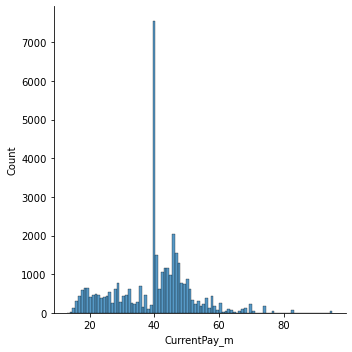

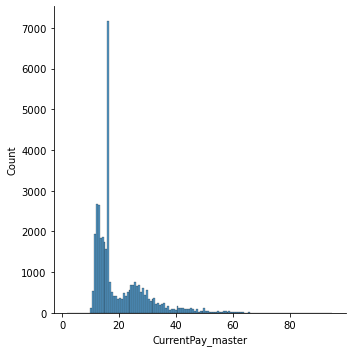

In [22]:
sb.displot(data_all['CurrentPay_m'])
sb.displot(data_all['CurrentPay_master'])

In [23]:
#data_all['CurrentPay_m_logged']=np.log(data_all['CurrentPay_m'])
data_all['CurrentPay_master_logged']=np.log(data_all['CurrentPay_master'])

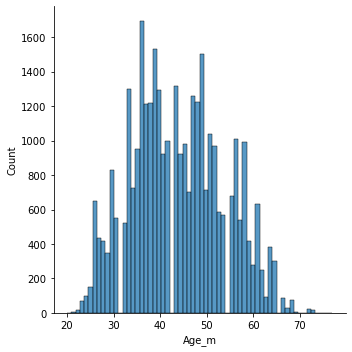

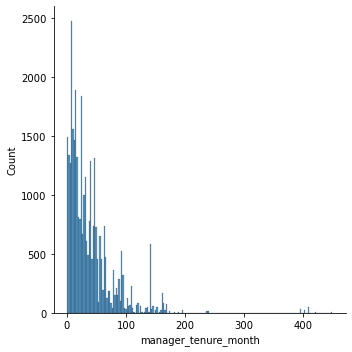

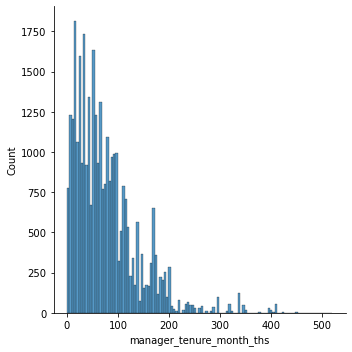

In [24]:
# Transform Age and Tenure to float objects
data_all['Age_m']=(pd.to_numeric(data_all['Age_m'], errors='coerce'))
data_all['manager_tenure_month']=(pd.to_numeric(data_all['manager_tenure_month'], errors='coerce'))
data_all['manager_tenure_month_ths']=(pd.to_numeric(data_all['manager_tenure_month_ths'], errors='coerce'))

# Examine distribution
sb.displot(data_all['Age_m'])
sb.displot(data_all['manager_tenure_month'])
sb.displot(data_all['manager_tenure_month_ths'])

## Tenure is very positively sckewed. Fill missing values with median and log transform

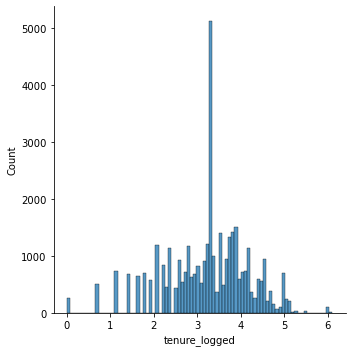

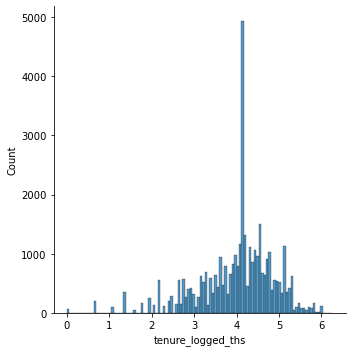

In [25]:
# fill in missing values for Age and Tenure
data_all['Age_m'].fillna(data_all['Age_m'].mean(), inplace=True)
data_all['manager_tenure_month'].fillna(data_all['manager_tenure_month'].median(), inplace=True)
data_all['manager_tenure_month_ths'].fillna(data_all['manager_tenure_month_ths'].median(), inplace=True)

# Log transfor tenure. (+1 to avoid dealing with zero log)
data_all['tenure_logged']=np.log(data_all['manager_tenure_month']+1)
data_all['tenure_logged_ths']=np.log(data_all['manager_tenure_month_ths']+1)
sb.displot(data_all['tenure_logged'])
sb.displot(data_all['tenure_logged_ths'])

In [26]:
# Check location of missing values
data_all.loc[(data_all['Female_m'].isnull()) | (data_all['Race_m'].isnull())]

# Drop rows with missing Female and Race values
data_all2 = data_all[pd.notnull(data_all['Female_m'])]
data_all2 = data_all2[pd.notnull(data_all2['Race_m'])]

## Managers only with 5 and more reports

In [27]:
# Aggregate for manager and each survey
count_mng=data_all2.groupby(['ManagerID', 'SurveyYear', 'SurveyMonth']).count()

# Drop those that have less than 5 reports
count_mng=count_mng[count_mng["survey_code"]>=5]

index1 = pd.MultiIndex.from_arrays([data_all2[col] for col in ['ManagerID', 'SurveyYear', 'SurveyMonth']])

# Keep only managers that have 5+ reports in the main dataset
data_all3=data_all2.loc[index1.isin(count_mng.index)]

In [28]:
# Create dataset of questions
quest60=data_all3.iloc[:, 2:62]

y_quest=data_all3[["ti_1", "ti_2", "ti_3", "ti_4", "ti_5", "ti_8", "ti_10", "ti_11", "ti_12", "ti_16", "ti_17", "ti_23",
                    "ti_25", "ti_26", "ti_27", "ti_28", "ti_29", "ti_30", "ti_32", "ti_33", "ti_35", "ti_36", "ti_37", "ti_38",
                "ti_40", "ti_41", "ti_42", "ti_44", "ti_45", "ti_48", "ti_49", "ti_50", "ti_51", "ti_52", "ti_53", "ti_55", "ti_56", 
                "ti_57", "ti_58", "ti_59", "ti_60"]]

In [29]:
## Create dictionary of Locations
data_all3.Location = data_all3['LocationName_y'].map(str.strip)
all_locations = data_all3.Location.unique()
locations = len(all_locations)
location_lookup = dict(zip(all_locations, range(locations)))



<ipython-input-29-0cefe09ecdd1>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_all3.Location = data_all3['LocationName_y'].map(str.strip)


<AxesSubplot:>

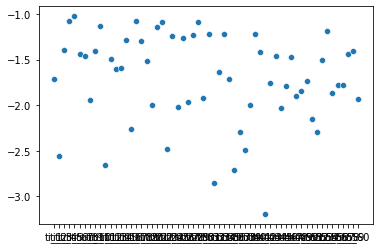

In [30]:
# Check the skewness of survey responses
skewv=quest60.skew(axis=0)
sb.scatterplot(data=skewv)

# All questions are negatively skewed. 

# PART 1. Creating input variables

## GROUP CENTERING DATA

In [31]:
data_all3['Survey_no'] = 0
data_all3.loc[(data_all3['SurveyYear']==2018) & (data_all3['SurveyMonth']==8),'Survey_no'] = 1
data_all3.loc[(data_all3['SurveyYear']==2019) & (data_all3['SurveyMonth']==3),'Survey_no'] = 2
data_all3.loc[(data_all3['SurveyYear']==2019) & (data_all3['SurveyMonth']==8),'Survey_no'] = 3
data_all3.loc[(data_all3['SurveyYear']==2020) & (data_all3['SurveyMonth']==2),'Survey_no'] = 4

<ipython-input-31-8d32e4b12e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all3['Survey_no'] = 0
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [32]:
# Group Centering all 60 questions
temp_data=data_all3[['ManagerID','Survey_no']]

temp_data=pd.concat([temp_data, quest60], axis=1)
means = temp_data.groupby(['ManagerID', 'Survey_no']).transform('mean')
temp_data2 = temp_data - means


In [33]:
quest60_2=temp_data2.iloc[:, 2:62]
quest60_2.columns

Index(['ti_1', 'ti_10', 'ti_11', 'ti_12', 'ti_13', 'ti_14', 'ti_15', 'ti_16',
       'ti_17', 'ti_18', 'ti_19', 'ti_2', 'ti_20', 'ti_21', 'ti_22', 'ti_23',
       'ti_24', 'ti_25', 'ti_26', 'ti_27', 'ti_28', 'ti_29', 'ti_3', 'ti_30',
       'ti_31', 'ti_32', 'ti_33', 'ti_34', 'ti_35', 'ti_36', 'ti_37', 'ti_38',
       'ti_39', 'ti_4', 'ti_40', 'ti_41', 'ti_42', 'ti_43', 'ti_44', 'ti_45',
       'ti_46', 'ti_47', 'ti_48', 'ti_49', 'ti_5', 'ti_50', 'ti_51', 'ti_52',
       'ti_53', 'ti_54', 'ti_55', 'ti_56', 'ti_57', 'ti_58', 'ti_59', 'ti_6',
       'ti_60', 'ti_7', 'ti_8', 'ti_9'],
      dtype='object')

count    2.885700e+04
mean    -1.822094e-17
std      9.974247e-01
min     -4.681818e+00
25%     -4.545455e-01
50%      2.307692e-01
75%      6.551724e-01
max      3.200000e+00
Name: ti_47, dtype: float64

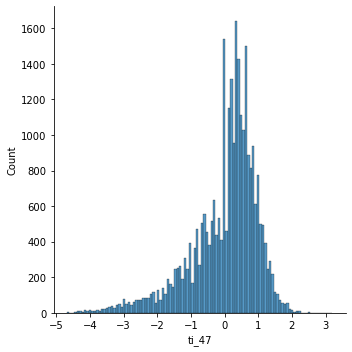

In [34]:
# Plot for question 6
sb.displot(quest60_2['ti_47'])  # average
quest60_2['ti_47'].describe()

In [35]:
x_man_quest=quest60_2[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]


# PART 2. Creating Y variable

## Factor analysis with 41 survey responses

In [36]:
## Factor Adequcy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(y_quest)
chi_square_value, p_value

(1006828.1470279451, 0.0)

In [37]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(y_quest)
kmo_model
#0.99  This value indicates that you can proceed with your planned factor analysis.

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.9914144142733702

[23.75742228  1.37417903  1.02928488  0.86178106  0.77822821  0.75070015
  0.63823722  0.58127127  0.54142308  0.51377016  0.49476705  0.47265638
  0.45316951  0.44199174  0.42435609  0.41513377  0.40015291  0.38371694
  0.37530905  0.36858936  0.36297212  0.34938978  0.3432485   0.33490774
  0.32515495  0.32007077  0.31036618  0.30713698  0.30267488  0.29546396
  0.28646453  0.2854251   0.27652523  0.26698189  0.24643766  0.24302491
  0.23075291  0.22909111  0.22053377  0.2055564   0.20168049]


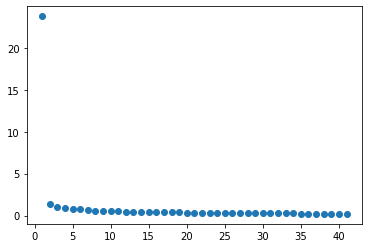

In [38]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=20)
fa.fit(y_quest)
ev, v = fa.get_eigenvalues()  # for eigen values
plt.scatter(range(1,y_quest.shape[1]+1),ev)
print(ev)  # only three factors arabove 1, so run analysis with 3 factors and get the factor loadings.  


In [39]:
# factor analysis with three factors
fa_y = FactorAnalyzer(n_factors=3, rotation='varimax')
y_quest_transformed=fa_y.fit_transform(y_quest)

#Create the factors
# Depends on which questions load into which factors
# Many iterations showed that question loadings do not change much
#factor1 = quest60[["ti_3", "ti_4", "ti_5", "ti_10", "ti_12", "ti_26", "ti_28", "ti_29", "ti_40"]]
happiness_f = y_quest[["ti_37", "ti_48", "ti_51", "ti_53", "ti_55", "ti_60" ]]
#fair_treatment = quest60[["ti_27","ti_32", "ti_36", "ti_42"]]
happiness_y=y_quest_transformed[:, 1]

#loads = fa_y.loadings_
#print(loads)

In [40]:
fa_y.get_factor_variance()

(array([10.58262935,  8.44380655,  6.03186785]),
 array([0.25811291, 0.2059465 , 0.14711873]),
 array([0.25811291, 0.46405941, 0.61117814]))

In [41]:
data_all3['happiness_y']=happiness_y

<ipython-input-41-40e905664eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all3['happiness_y']=happiness_y


## Check distribution of Redpondent level Happiness Index

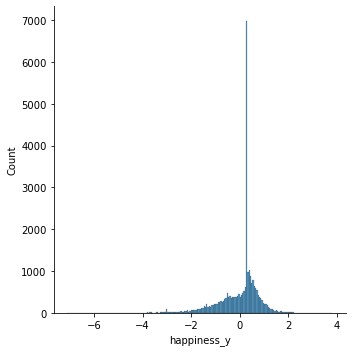

In [42]:
sb.displot(data_all3['happiness_y'])

# Part3:  Create Manager level demographic variables dataset

In [43]:
mng_demog=data_all3[["ManagerID", "Survey_no", "Location Name_m", "state_id", "Status_m", "Work Status_m", 
                     "Female_m","Age_m",  "tenure_logged", 'tenure_logged_ths', "CurrentPay_m", ]]

mng_demog_df=pd.DataFrame(mng_demog)
mng_demog_df.reset_index(inplace=True)

#mng_demog_df.to_csv("manager_demog.csv", index=False)

## Check distribution of Manager level demographics

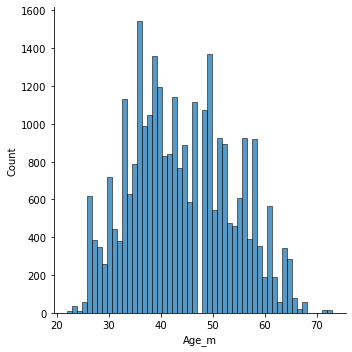

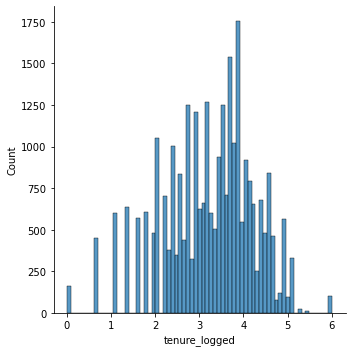

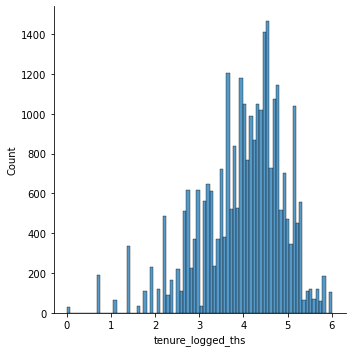

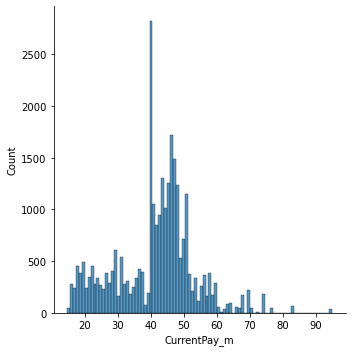

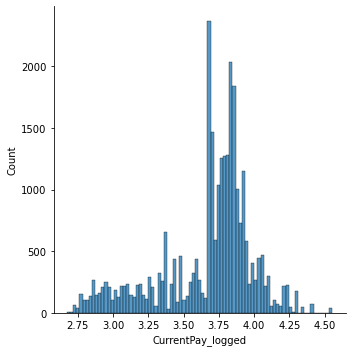

In [44]:
sb.displot(mng_demog_df['Age_m'])  # Age is normally distributed. 

sb.displot(mng_demog_df['tenure_logged']) # tenure also normally distributed
sb.displot(mng_demog_df['tenure_logged_ths'])
sb.displot(mng_demog_df['CurrentPay_m'])   # log transform needed
mng_demog_df['CurrentPay_logged']=np.log(mng_demog_df['CurrentPay_m'])
sb.displot(mng_demog_df['CurrentPay_logged'])

## SCALE all variables

In [45]:
## All the necessary variables are created. 

# 1. Scale Manager Level Demographic data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
mng_demog_df['CurrentPay_logged']=sc.fit_transform(mng_demog_df['CurrentPay_logged'].values.reshape(-1,1))
mng_demog_df['tenure_logged']=sc.fit_transform(mng_demog_df['tenure_logged'].values.reshape(-1,1))
mng_demog_df['tenure_logged_ths']=sc.fit_transform(mng_demog_df['tenure_logged_ths'].values.reshape(-1,1))
mng_demog_df['Age_m']=sc.fit_transform(mng_demog_df['Age_m'].values.reshape(-1,1))


  ## Encodong categorial variables
mng_demog_df=pd.get_dummies(mng_demog_df, columns=[ "Status_m", "Work Status_m", "state_id" ], 
                            prefix=['status', 'ws', 'state'], drop_first=True)




# 2. Scale output (happiness feature) Already within -3 and 3. 
data_all3['happiness_y']=sc.fit_transform(data_all3['happiness_y'].values.reshape(-1,1))


## Mean Encode Race.
   
from category_encoders import TargetEncoder
xx_r=data_all3[['Race_m']]
yy_r=data_all3[['happiness_y']]
 
mean_ec = TargetEncoder(cols=['Race_m'])
Race_ec=mean_ec.fit_transform(xx_r, yy_r)



#3. Scale input features
x_man_quest_sc=pd.DataFrame(sc.fit_transform(x_man_quest))  # This strips names of columns. So add column names back

x_man_quest_sc.columns=["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]




<ipython-input-45-f7ae5de9f6bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all3['happiness_y']=sc.fit_transform(data_all3['happiness_y'].values.reshape(-1,1))
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [46]:
Race_ec=Race_ec.reset_index(drop=True)

In [47]:
## MERGING ALL INTO ONE FILE

datas2=pd.concat([mng_demog_df, Race_ec, x_man_quest_sc], axis=1)  # with target encoding
datas2.shape

(28857, 44)

In [48]:
datas2
datas2.reset_index(inplace=True)
datas2=datas2.iloc[:, 1:]

In [49]:
happiness=data_all3[['happiness_y']]
happiness.reset_index(inplace=True)
happiness=happiness.iloc[:, 1:]

In [50]:
happiness

,happiness_y
0,0.330082
1,0.484300
2,0.330082
3,-0.974117
4,0.256832
...,...
28852,-0.009674
28853,-0.334737
28854,0.603573
28855,0.330082


In [51]:
## Add happiness to this data

datas2=pd.concat([datas2, happiness], axis=1) 
datas2.reset_index(inplace=True)

In [52]:
department=data_all3[['ManagerID', 'Survey_no', 'DepartmentName_y']]
department.reset_index(inplace=True)

In [53]:
## ADD DEPARTMENT NAMES TO THE DATA
datas2=pd.merge(datas2, department, how='left', indicator=True)

In [54]:
datas2.groupby(["_merge"]).count()

,level_0,index,ManagerID,Survey_no,Location Name_m,Female_m,Age_m,tenure_logged,tenure_logged_ths,CurrentPay_m,...,ti_24,ti_31,ti_34,ti_39,ti_43,ti_46,ti_47,ti_54,happiness_y,DepartmentName_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,28857,28857,28857,28857,28857,28857,28857,28857,28857,28857,...,28857,28857,28857,28857,28857,28857,28857,28857,28857,18901


In [55]:
datas2=datas2.iloc[:, 2:]

## Only female managers


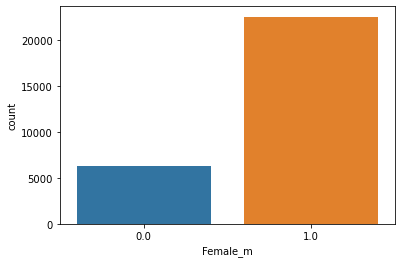

In [56]:
Female=data_all3['Female_m']
ax = sb.countplot(x=Female)

In [57]:
datas2['Female_m'].mean()

0.7809890147971029

In [58]:
## SUBSET and test with only female managers
data_f=datas2.loc[(datas2['Female_m'] == 1)]
data_f.head(5)
                  

,ManagerID,Survey_no,Location Name_m,Female_m,Age_m,tenure_logged,tenure_logged_ths,CurrentPay_m,CurrentPay_logged,status_D,...,ti_31,ti_34,ti_39,ti_43,ti_46,ti_47,ti_54,happiness_y,DepartmentName_y,_merge
2,4110.0,1,Trilogy Home Office - 900,1.0,0.818132,-0.893315,1.560868,39.747569,0.039322,0,...,0.204117,0.303648,0.544570,0.215936,0.546393,0.300780,0.642428,0.330082,NaN,both
4,135162.0,1,Trilogy Home Office - 900,1.0,-0.613928,-3.140315,-4.244982,39.747569,0.039322,0,...,0.340196,0.337386,0.363046,0.359894,0.182131,0.167100,0.356904,0.256832,NaN,both
5,33995.0,1,Cobblestone Crossings - 129,1.0,2.147901,1.313848,0.601330,49.420000,0.692998,0,...,-0.118673,-0.070616,-0.430590,-0.477068,-0.432031,-0.046633,-0.821710,-1.135522,NaN,both
6,33995.0,1,Cobblestone Crossings - 129,1.0,2.147901,1.313848,0.601330,49.420000,0.692998,0,...,-0.118673,-0.070616,-0.430590,-0.477068,-0.432031,-0.046633,0.249003,-0.609988,NaN,both
7,1866.0,1,Trilogy Home Office - 900,1.0,0.408972,1.282866,1.380640,39.747569,0.039322,0,...,-3.644954,-3.614855,-3.967579,-3.547522,-3.590579,-3.294255,-3.747494,-3.389469,NaN,both


# PART 4 REGRESSION

In [59]:
x_19=data_f[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]

# No female needed for this
x_demog2=data_f[['Race_m', "Age_m", "tenure_logged", "tenure_logged_ths", "CurrentPay_m",
                   'status_D', 'status_L', 'status_P', 'status_T', 'ws_P', 'state_IL',
               'state_IN','state_KY','state_MA','state_MI','state_NM','state_OH','state_PA','state_TN']]

x_19_demog2=pd.concat([x_19, x_demog2], axis=1)

y=data_f['happiness_y']

In [60]:
x_19_demog2

,ti_6,ti_7,ti_9,ti_13,ti_14,ti_15,ti_18,ti_19,ti_20,ti_21,...,ws_P,state_IL,state_IN,state_KY,state_MA,state_MI,state_NM,state_OH,state_PA,state_TN
2,0.213365,0.205632,0.201569,0.210522,0.326027,0.304526,0.398912,0.211333,0.353113,0.287550,...,0,0,0,1,0,0,0,0,0,0
4,-0.355608,0.514081,0.335949,0.350870,-0.724504,-3.891163,-0.332427,0.176111,0.588522,-0.159750,...,0,0,0,1,0,0,0,0,0,0
5,-0.198479,-0.095643,-1.031285,0.122396,-0.025273,-0.637380,-1.136435,-0.344030,-0.465343,-0.936210,...,0,0,1,0,0,0,0,0,0,0
6,-0.198479,-0.095643,-0.023438,0.122396,-0.025273,0.377706,-0.139155,-0.344030,-0.465343,0.022291,...,0,0,1,0,0,0,0,0,0,0
7,-3.810089,-3.451688,-3.455475,-3.608947,-3.803645,-3.552801,-3.490480,-3.698326,-4.203731,-3.354751,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,-1.092845,-2.858793,-2.826887,-3.209175,-1.219287,-2.673885,-2.651305,-1.932923,-1.808629,-2.291050,...,0,0,0,0,0,1,0,0,0,0
28853,-0.207438,-0.114240,-1.119830,-0.233913,-0.211314,-1.127873,-1.939155,-1.291479,-0.490435,-3.008626,...,0,0,1,0,0,0,0,0,0,0
28854,0.492381,-0.474536,0.387633,0.161940,0.501580,-0.390418,0.536997,0.487691,0.271626,0.737308,...,0,0,1,0,0,0,0,0,0,0
28855,0.762018,1.028162,1.151825,1.202982,1.086756,1.160098,0.997280,1.056665,1.345194,0.958500,...,0,0,0,0,0,0,0,1,0,0


## RUN LASSO FOR FEATURE SELECTION

In [61]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
# RUN LASSO 10000 times and save features with high predictive power

x_lasso = x_19_demog2
y_lasso = y

train_number = 1000


# before loop
test_r_squared = np.zeros((train_number,1))
train_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number, x_lasso.shape[1]))


for trialNo in range(train_number):
    
    #SAMPLE SPLIT: 75-25
    x_lasso_train, x_lasso_test, y_lasso_train, y_lasso_test = train_test_split(x_lasso, y_lasso, test_size=0.25)

    reg = LassoCV(cv=5).fit(x_lasso_train, y_lasso_train)

    YpredLasso = reg.predict(x_lasso_test)
    YpredLasso_train = reg.predict(x_lasso_train)
    
    test_r_squared[trialNo] = r2_score(y_lasso_test, YpredLasso)
    train_r_squared[trialNo] = r2_score(y_lasso_train, YpredLasso_train)
    lasso_coef[trialNo,:] = reg.coef_ 


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


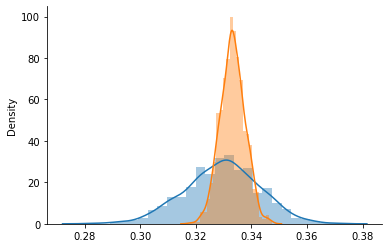

In [63]:
#Distribution of R-squared for test and train set
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

train_r_squared_df=pd.DataFrame(data=train_r_squared)
train_r_squared_df.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()
sb.distplot(train_r_squared_df)
sb.despine()

### Check top features

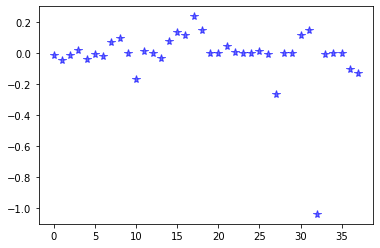

In [64]:
lasso_coef_df = pd.DataFrame(data=lasso_coef)

mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.6,linestyle='none',marker='*',markersize=8,color='blue') 

In [65]:
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.index

Int64Index([32, 27, 17, 10, 18, 31, 15, 37, 16, 30, 36,  8, 14,  7, 21,  1,  4,
            13,  3,  6, 11, 25,  0,  2, 22, 33,  5, 23, 26, 28,  9, 19, 20, 12,
            35, 34, 24, 29],
           dtype='int64')

## RUN REGRESSION WITH TOP FEATURES

In [66]:
# GET ONLY 10 features.


all_x = x_19_demog2

features_number = 10
#get the top n features
top_coef=abs_mean_coef.sort_values(ascending=False)

lasso10_features = all_x.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    lasso10_features = pd.concat([lasso10_features, all_x.iloc[:,top_coef.index[features+1]]], axis = 1)

    
x_linear = lasso10_features
y_linear = y

train_number = 10000

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_r_squared_train = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split Test and Train set 0.25 %
    xlin_train, xlin_test, ylin_train, ylin_test = train_test_split(x_linear, y_linear, test_size=0.25)
    
    linear_reg = linear_model.LinearRegression()
    
    model = linear_reg.fit(xlin_train, ylin_train)
    
    Ypred_lin_train = linear_reg.predict(xlin_train)
    Ypred_lin = linear_reg.predict(xlin_test)
    
    linear_r_squared_train[trialNo] = r2_score(ylin_train, Ypred_lin_train)
    linear_r_squared[trialNo] = r2_score(ylin_test, Ypred_lin)
    linear_coef[trialNo,:] = linear_reg.coef_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


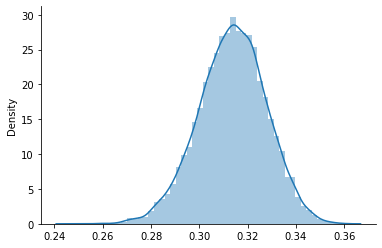

In [67]:
#Distribution of R-squared
r2_df=pd.DataFrame(data=linear_r_squared)
r2_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

r2_df_train=pd.DataFrame(data=linear_r_squared_train)
r2_df_train.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

#sb.distplot(r2_df_train)
#sb.despine()
sb.distplot(r2_df)
sb.despine()

In [68]:
r2=linear_r_squared.mean()
print(r2)

0.31360763707540956


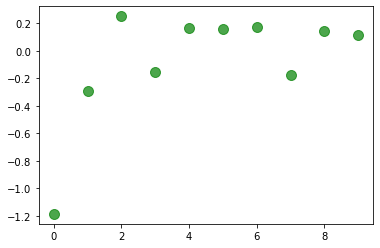

In [69]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='green') 

In [70]:
mean_linear_coef

0   -1.185622
1   -0.294707
2    0.252337
3   -0.155801
4    0.168321
5    0.159399
6    0.172158
7   -0.171663
8    0.145388
9    0.113557
dtype: float64

In [71]:
abs_mean_coef=abs(mean_linear_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef


0    1.185622
1    0.294707
2    0.252337
6    0.172158
7    0.171663
4    0.168321
5    0.159399
3    0.155801
8    0.145388
9    0.113557
dtype: float64

In [72]:
lasso10_features

,state_MA,status_T,ti_47,ti_22,ti_54,state_KY,ti_43,state_TN,ti_46,state_IN
2,0,0,0.300780,0.358309,0.642428,1,0.215936,0,0.546393,0
4,0,0,0.167100,0.298591,0.356904,1,0.359894,0,0.182131,0
5,0,0,-0.046633,0.083328,-0.821710,0,-0.477068,0,-0.432031,1
6,0,0,-0.046633,0.083328,0.249003,0,-0.477068,0,-0.432031,1
7,0,0,-3.294255,-2.943254,-3.747494,0,-3.547522,0,-3.590579,1
...,...,...,...,...,...,...,...,...,...,...
28852,0,0,-2.787715,-1.944483,-2.141425,0,-3.265376,0,-3.438275,0
28853,0,0,-1.197549,-0.721595,-1.368133,0,0.659805,0,0.789234,1
28854,0,0,0.462738,0.620150,0.576538,0,0.664419,0,0.420302,1
28855,0,0,1.289056,0.895773,1.223672,0,1.079681,0,1.092785,0


In [73]:
mean_linear_coef=pd.DataFrame(mean_linear_coef)
list_names=('state_MA', 'status_T', 'ti_47', 'ti_22', 'ti_54', 'state_KY', 'ti_43', 'state_TN', 'ti_46', 'state_IN')

mean_linear_coef['names']=list_names
mean_linear_coef=mean_linear_coef.set_index('names')

Text(0.5, 1.0, 'Feature Importance')

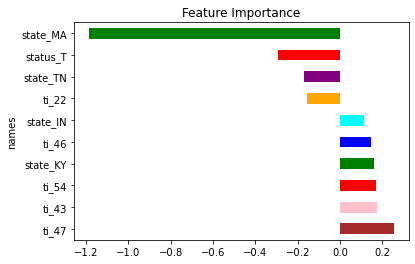

In [74]:
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple', 'red', 'green']
coef= mean_linear_coef[0]
coef=coef.sort_values(ascending=False)
import matplotlib
fig, ax = plt.subplots()
matplotlib.rcParams['figure.figsize'] = (6.0, 8.0)
coef.plot(kind = "barh", color=my_colors)
plt.title("Feature Importance")

## Only Male Managers

In [75]:
## SUBSET and test with only female managers
data_m=datas2.loc[(datas2['Female_m'] == 0)]
data_m.head(5)

,ManagerID,Survey_no,Location Name_m,Female_m,Age_m,tenure_logged,tenure_logged_ths,CurrentPay_m,CurrentPay_logged,status_D,...,ti_31,ti_34,ti_39,ti_43,ti_46,ti_47,ti_54,happiness_y,DepartmentName_y,_merge
0,102990.0,1,Trilogy Home Office - 900,0.0,2.147901,-0.715395,0.047830,39.747569,0.039322,0,...,2.267971e-01,0.562311,4.840620e-01,2.399291e-01,3.642617e-01,2.227998e-01,4.758723e-01,0.330082,NaN,both
1,27221.0,1,Trilogy Home Office - 900,0.0,0.511262,-0.169288,0.755480,39.747569,0.039322,0,...,2.512980e-18,-0.809728,1.877243e-18,1.807770e-17,1.614452e-18,1.234345e-18,2.109123e-18,0.484300,NaN,both
3,8959.0,1,Paragon HO - 1100,0.0,0.511262,1.531605,1.176384,39.747569,0.039322,0,...,-1.020587e+00,-1.265199,-6.807121e-01,-6.748005e-01,-4.097944e-01,-5.012996e-01,-5.353563e-01,-0.974117,NaN,both
8,11817.0,1,Trilogy Home Office - 900,0.0,-0.102478,-0.893315,1.103129,39.747569,0.039322,0,...,2.783419e-01,0.276043,1.980254e-01,1.963056e-01,1.986882e-01,6.380177e-01,2.920125e-01,0.330082,NaN,both
10,41261.0,1,The Lakes of Sylvania - 427,0.0,0.102102,0.241757,0.433963,62.040000,1.375537,0,...,2.041174e-01,0.202432,1.877243e-18,1.807770e-17,2.185570e-01,1.234345e-18,2.141425e-01,0.330082,NaN,both


## Regression with MALE

In [76]:
x_19=data_m[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]

# No female needed for this
x_demog2=data_m[['Race_m', "Age_m", "tenure_logged", "tenure_logged_ths", "CurrentPay_m",
                   'status_D', 'status_L', 'status_P', 'status_T', 'ws_P', 'state_IL',
               'state_IN','state_KY','state_MA','state_MI','state_NM','state_OH','state_PA','state_TN']]

x_19_demog2=pd.concat([x_19, x_demog2], axis=1)

y=data_m['happiness_y']

In [77]:
# RUN LASSO 10000 times and save features with high predictive power

x_lasso = x_19_demog2
y_lasso = y

train_number = 1000


# before loop
test_r_squared = np.zeros((train_number,1))
train_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number, x_lasso.shape[1]))


for trialNo in range(train_number):
    
    #SAMPLE SPLIT: 75-25
    x_lasso_train, x_lasso_test, y_lasso_train, y_lasso_test = train_test_split(x_lasso, y_lasso, test_size=0.25)

    reg = LassoCV(cv=5).fit(x_lasso_train, y_lasso_train)

    YpredLasso = reg.predict(x_lasso_test)
    YpredLasso_train = reg.predict(x_lasso_train)
    
    test_r_squared[trialNo] = r2_score(y_lasso_test, YpredLasso)
    train_r_squared[trialNo] = r2_score(y_lasso_train, YpredLasso_train)
    lasso_coef[trialNo,:] = reg.coef_ 


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


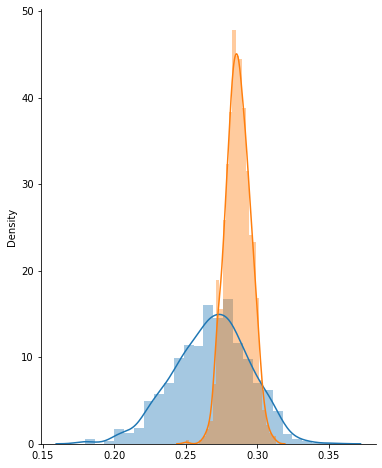

In [78]:
#Distribution of R-squared for test and train set
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

train_r_squared_df=pd.DataFrame(data=train_r_squared)
train_r_squared_df.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()
sb.distplot(train_r_squared_df)
sb.despine()

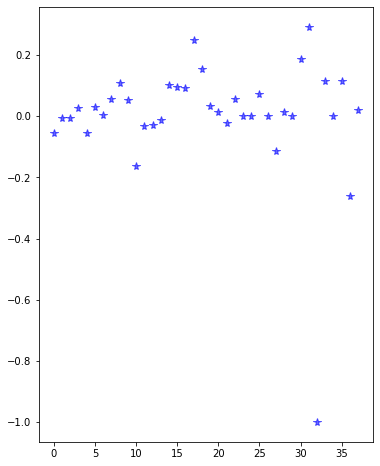

In [79]:
lasso_coef_df = pd.DataFrame(data=lasso_coef)

mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.6,linestyle='none',marker='*',markersize=8,color='blue') 

In [80]:
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.index

Int64Index([32, 31, 36, 17, 30, 10, 18, 35, 33, 27,  8, 14, 15, 16, 25,  7, 22,
             0,  4,  9, 11, 19, 12,  5,  3, 21, 37, 13, 28, 20,  2,  1,  6, 23,
            24, 26, 29, 34],
           dtype='int64')

In [81]:
# GET ONLY 10 features.


all_x = x_19_demog2

features_number = 10
#get the top n features
top_coef=abs_mean_coef.sort_values(ascending=False)

lasso10_features = all_x.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    lasso10_features = pd.concat([lasso10_features, all_x.iloc[:,top_coef.index[features+1]]], axis = 1)

    
x_linear = lasso10_features
y_linear = y

train_number = 10000

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_r_squared_train = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split Test and Train set 0.25 %
    xlin_train, xlin_test, ylin_train, ylin_test = train_test_split(x_linear, y_linear, test_size=0.25)
    
    linear_reg = linear_model.LinearRegression()
    
    model = linear_reg.fit(xlin_train, ylin_train)
    
    Ypred_lin_train = linear_reg.predict(xlin_train)
    Ypred_lin = linear_reg.predict(xlin_test)
    
    linear_r_squared_train[trialNo] = r2_score(ylin_train, Ypred_lin_train)
    linear_r_squared[trialNo] = r2_score(ylin_test, Ypred_lin)
    linear_coef[trialNo,:] = linear_reg.coef_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


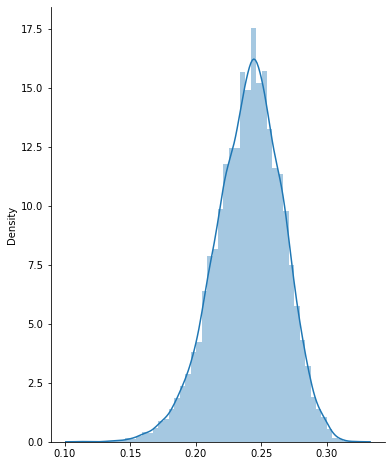

In [82]:
#Distribution of R-squared
r2_df=pd.DataFrame(data=linear_r_squared)
r2_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

r2_df_train=pd.DataFrame(data=linear_r_squared_train)
r2_df_train.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

#sb.distplot(r2_df_train)
#sb.despine()
sb.distplot(r2_df)
sb.despine()

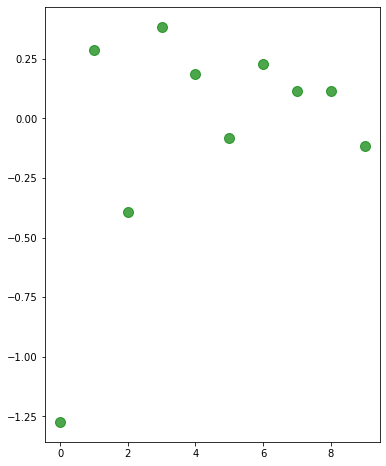

In [83]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='green') 

In [84]:
abs_mean_coef=abs(mean_linear_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef


0    1.273723
2    0.392328
3    0.384034
1    0.285356
6    0.226078
4    0.184402
9    0.117736
8    0.116018
7    0.115049
5    0.081765
dtype: float64

In [85]:
lasso10_features

,state_MA,state_KY,state_PA,ti_47,state_IN,ti_22,ti_54,state_OH,state_MI,status_T
0,0,1,0,2.227998e-01,0,3.981213e-01,4.758723e-01,0,0,0
1,0,1,0,1.234345e-18,0,-1.433237e+00,2.109123e-18,0,0,0
3,0,1,0,-5.012996e-01,0,-1.343659e+00,-5.353563e-01,0,0,0
8,0,0,0,6.380177e-01,0,3.257356e-01,2.920125e-01,1,0,0
10,0,0,0,1.234345e-18,0,-5.734695e-18,2.141425e-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...
28795,0,0,0,6.683995e-01,0,-2.985910e-01,-3.569042e-01,1,0,0
28812,0,1,0,-4.010397e+00,0,-1.254082e+00,-8.565701e-01,0,0,0
28820,0,0,0,1.156845e+00,0,1.102490e+00,1.235438e+00,0,1,1
28836,0,0,0,1.234345e-18,1,-5.734695e-18,2.109123e-18,0,0,0


In [86]:
mean_linear_coef=pd.DataFrame(mean_linear_coef)
list_names=('state_MA', 'state_KY', 'state_PA', 'ti_47', 'state_IN',  'ti_22', 'ti_54',  'state_MI', 'state_OH' , 'status_T')

mean_linear_coef['names']=list_names
mean_linear_coef=mean_linear_coef.set_index('names')

Text(0.5, 1.0, 'Feature Importance')

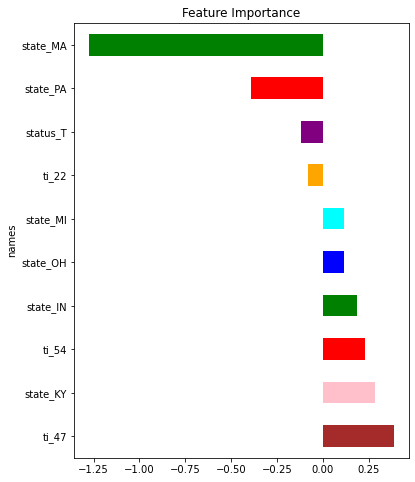

In [87]:
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple', 'red', 'green']
coef= mean_linear_coef[0]
coef=coef.sort_values(ascending=False)
import matplotlib
fig, ax = plt.subplots()
matplotlib.rcParams['figure.figsize'] = (6.0, 8.0)
coef.plot(kind = "barh", color=my_colors)
plt.title("Feature Importance")